In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from keras import models, layers, Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense , Dropout , Conv2D , MaxPooling2D, Flatten
from keras.preprocessing.image import *
from tensorflow.keras.optimizers import Adam

In [6]:
df_train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
df_test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [7]:
df_train.shape, df_test.shape

((42000, 785), (28000, 784))

In [8]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
pixel_data = df_train.iloc[:,1:785] #from column 1 to 785
labels = df_train["label"]

In [10]:
# reshape
number = np.array(pixel_data)
number = number.reshape(len(pixel_data),28,28,1)

Text(0.5, 1.0, 'Value is: 4')

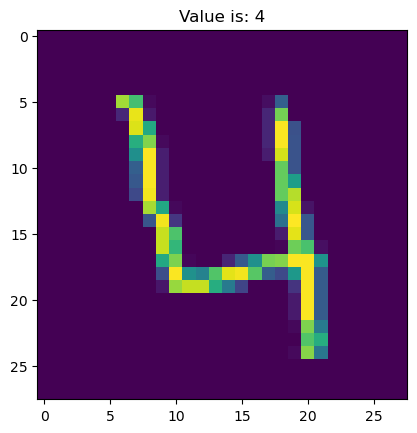

In [13]:
plt.imshow(number[3])
plt.title("Value is: %d" % labels[3])

Text(0.5, 1.0, 'Value is: 1')

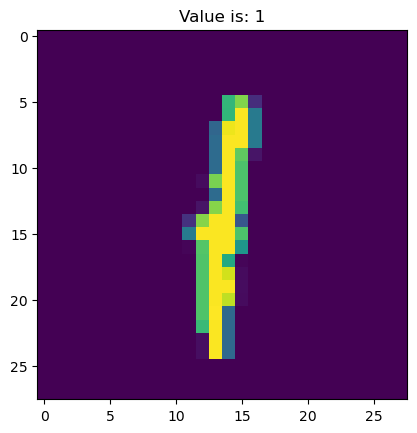

In [14]:
plt.imshow(number[12])
plt.title("Value is: %d" % labels[12])

In [16]:
x_train, x_test, y_train, y_test= train_test_split(number, labels, test_size=0.2, random_state=42)

In [17]:
img_data_gen=ImageDataGenerator()

model=Sequential()

model.add(Conv2D(8, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

2023-02-18 17:54:00.009377: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64::/opt/conda/lib
2023-02-18 17:54:00.009440: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


In [18]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# training with 50 epochs
model.fit(x_train, y_train,epochs=50)

Epoch 1/50
1050/1050 [==============================] - 16s 14ms/step - loss: 2.3242 - accuracy: 0.1875
Epoch 2/50
1050/1050 [==============================] - 15s 14ms/step - loss: 1.9868 - accuracy: 0.2301
Epoch 3/50
1050/1050 [==============================] - 15s 14ms/step - loss: 1.7200 - accuracy: 0.3478
Epoch 4/50
1050/1050 [==============================] - 15s 14ms/step - loss: 1.2624 - accuracy: 0.5532
Epoch 5/50
1050/1050 [==============================] - 15s 14ms/step - loss: 0.8028 - accuracy: 0.7397
Epoch 6/50
1050/1050 [==============================] - 15s 14ms/step - loss: 0.5565 - accuracy: 0.8282
Epoch 7/50
1050/1050 [==============================] - 15s 14ms/step - loss: 0.4385 - accuracy: 0.8657
Epoch 8/50
1050/1050 [==============================] - 15s 14ms/step - loss: 0.4019 - accuracy: 0.8764
Epoch 9/50
1050/1050 [==============================] - 15s 14ms/step - loss: 0.3762 - accuracy: 0.8857
Epoch 10/50
1050/1050 [==============================] - 15s 14m

In [22]:
y_pred = model.predict(x_test)
y_predict = [np.argmax(y_pred[i]) for i in range(len(y_pred))]

263/263 [==============================] - 1s 5ms/step


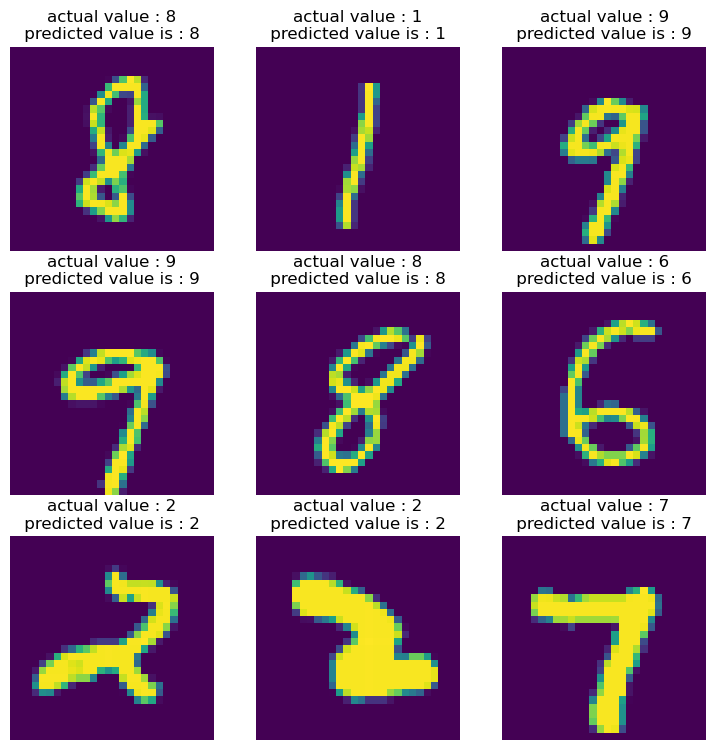

In [25]:
y_list = y_test.to_list()
plt.figure(figsize=(9,9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i])
    plt.axis('off')
    plt.title('actual value : %d' %y_list[i]+ '\n predicted value is : %d ' % y_predict[i])

In [26]:
# validation accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9854761904761905

In [27]:
# Predictions for submission using the test data

df_test = np.array(df_test)
df_test = df_test.reshape(len(df_test),28,28,1)
result = model.predict(df_test)
predicted_val=[]
for i in range(len(result)):
    predicted_val.append(np.argmax(result[i]))

875/875 [==============================] - 4s 5ms/step


In [28]:
# make a csv for submission
# submission needs two columns -> ImageId and Label

submission=pd.DataFrame()
imgid=[]
for i in range(1, len(predicted_val)+1):
    imgid.append(i)
    
submission["Imageid"]=imgid
submission["Label"]=predicted_val

In [29]:
submission.head()

,Imageid,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [30]:
submission.to_csv('submission.csv',index=False)